Goal for this project is to do my first machine learning project.  

Want to take all the stats for Madden 18 players, and see if I can correctly categorize them into offense, defense, or special teams using machine learning. 

While I think some of it should be pretty easy (for example, only punters should be good at punting), I bet there will be some instance where it is a little more difficult (the difference between wide recievers and corner backs).  

Also curious to see how accurate I can get with different amount of data.  My initial reaction is that more data is always better, but it might lead to over fitting.  So could I do it with a little bit of data?

Also, think it would be a good way to explore some different ML algorithms.  Conceptiionally, I think SVM and K-means clutering would be good to look at.  But also, maybe decision trees and random forest?  Let's find out

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

%matplotlib inline

In [4]:
df = pd.read_csv("player_stat_18.csv")

After doing gaining some practice with Exploratory Data Analysis, I've been in favor of using the sample() function over head() or tail() because head/tail gives data that's all right next to each other.  In this case, using head() gives you players who are only on the Bucs.  However, sample() gives you a random sample of your data which gives me more confidence that the data loaded correctly and the data itself looks okay.  (Performs as a spot check).  

In [5]:
df.sample(5)

,Last Name,First Name,Position,Dev Trait,Overall Rating,Speed,Acceleration,Strength,Agility,Awareness,...,Height,Weight,Age,Birthdate,Years Pro,College,Total Salary,Signing Bonus,Handedness,portraitId
2315,Johnson,Tom,DT,-,71,60,73,80,63,78,...,75,288,33,8/30/84,7,Southern Miss,7000000,0,Right,5277
432,Stribling,Channing,CB,-,62,86,88,49,82,54,...,74,188,22,11/21/94,0,Michigan,1665000,0,Right,8737
251,Wood,Eric,C,-,73,63,76,88,69,88,...,76,310,31,3/18/86,8,Louisville,22500000,14000000,Right,3265
1352,Robinson,A'Shawn,DT,-,72,66,80,86,63,71,...,76,317,22,3/21/95,1,Alabama,5200000,2000000,Right,8197
257,Peterman,Nathan,QB,-,72,78,86,68,82,67,...,74,226,23,5/4/94,0,Pittsburgh,2595000,240000,Right,8686


In [6]:
df.columns

Index(['Last Name', 'First Name', 'Position', 'Dev Trait', 'Overall Rating',
       'Speed', 'Acceleration', 'Strength', 'Agility', 'Awareness', 'Catching',
       'Carrying', 'Throw Power', 'Throw Accuracy', 'Kick Power',
       'Kick Accuracy', 'Run Block', 'Pass Block', 'Tackle', 'Jumping',
       'Kick Return', 'Injury', 'Stamina', 'Toughness', 'Trucking',
       'Elusiveness', 'Ball Carrier Vision', 'Stiff Arm', 'Spin Move',
       'Juke Move', 'Impact Blocking', 'Run Block Strength',
       'Run Block Footwork', 'Pass Block Strength', 'Pass Block Footwork',
       'Power Moves', 'Finesse Moves', 'Block Shedding', 'Pursuit',
       'Play Recognition', 'Man Coverage', 'Zone Coverage',
       'Spectacular Catch', 'Catch In Traffic', 'Route Running', 'Hit Power',
       'Press', 'Release', 'Throw Accuracy Short', 'Throw Accuracy Mid',
       'Throw Accuracy Deep', 'Play Action', 'Throw on the Run', 'Height',
       'Weight', 'Age', 'Birthdate', 'Years Pro', 'College', 'Total Salary',

In [8]:
pos_list = list(df['Position'].unique())
pos_list.sort()
print(pos_list)

['C', 'CB', 'DT', 'FB', 'FS', 'HB', 'K', 'LE', 'LG', 'LOLB', 'LT', 'MLB', 'P', 'QB', 'RE', 'RG', 'ROLB', 'RT', 'SS', 'TE', 'WR']


In [10]:
#split positions into offense, defense, and special teams
off_pos_list = ['C','FB','HB','LG','LT','QB','RG','RT','TE','WR']
def_pos_list = ['CB','DT','FS','LE','LOLB','MLB','RE','ROLB','SS']
sTeams_pos_list = ['K','P']

In [11]:
#double check that both lists are the same length
print(len(pos_list) == len(off_pos_list+def_pos_list+sTeams_pos_list))

True


In [12]:
#Creates a new function to put each position into its own category.  
def define_pos(x):
    if x in off_pos_list:
        return('Off')
    if x in def_pos_list:
        return('Def')
    if x in sTeams_pos_list:
        return('sTeams')
    else:
        return("Missing")

In [19]:
df['pos_class'] = df['Position'].apply(define_pos)

#creates a new column in the pandas data frame named 'pos_class'
#where we have applied the define_pos() function to the 'position' column

#axis = 0 (default)  sends a column of every row to a function
#axis = 1            send every single row to a function (if you need multiple columns to get a result)

#wanted to send the value of the position column to define_pos(), so used axis=0

In [22]:
#confirm that function works as expected
df[['Position','pos_class']].sample(10)

,Position,pos_class
10,SS,Def
2316,LT,Off
820,CB,Def
1846,WR,Off
1116,P,sTeams
389,QB,Off
1828,CB,Def
1407,C,Off
716,LE,Def
778,MLB,Def


In [23]:
#clean df by removing extra columns

#extra columns
extra_cols = ['Last Name', 'First Name', 'Position','Birthdate','Years Pro','College','portraitId']

#extra columns
df.drop(extra_cols, inplace=True, axis=1)

#returns a new df with labels in requested axis removed
#list of columns to drop

#inplace 
#False (default) only drops the column in that version you are looking at
#True drops the column so the underlying data is affected

#axis
#axis = 0 drop rows     (0/index)
#axis = 1 drop columns  (1/columns)

In [25]:
print(df.columns)
print(len(df.columns))

Index(['Dev Trait', 'Overall Rating', 'Speed', 'Acceleration', 'Strength',
       'Agility', 'Awareness', 'Catching', 'Carrying', 'Throw Power',
       'Throw Accuracy', 'Kick Power', 'Kick Accuracy', 'Run Block',
       'Pass Block', 'Tackle', 'Jumping', 'Kick Return', 'Injury', 'Stamina',
       'Toughness', 'Trucking', 'Elusiveness', 'Ball Carrier Vision',
       'Stiff Arm', 'Spin Move', 'Juke Move', 'Impact Blocking',
       'Run Block Strength', 'Run Block Footwork', 'Pass Block Strength',
       'Pass Block Footwork', 'Power Moves', 'Finesse Moves', 'Block Shedding',
       'Pursuit', 'Play Recognition', 'Man Coverage', 'Zone Coverage',
       'Spectacular Catch', 'Catch In Traffic', 'Route Running', 'Hit Power',
       'Press', 'Release', 'Throw Accuracy Short', 'Throw Accuracy Mid',
       'Throw Accuracy Deep', 'Play Action', 'Throw on the Run', 'Height',
       'Weight', 'Age', 'Total Salary', 'Signing Bonus', 'Handedness',
       'pos_class'],
      dtype='object')
57


# EDA

Now that I have the data processed, I want to perform some Exploratory Data Analysis to see what the data looks like.  More specifically, I'm looking for variables where there is likely to be big differences between offense, defense, and special teams. 
Will first set up seaborn and create useful categories of like variables. 
Then will use SNS.pairplot() to look at the data as a whole
And finally use facet grid/group.by if anything pops in the pairplot

In [20]:
#print(plt.style.available)
plt.style.use('seaborn-dark')

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', '_classic_test']


Going to start with special teams.  Because kicking is extremely speacilized, I have a feeling that it will be easy to see a difference between offense/defense and special teams.

pos_class
Def       AxesSubplot(0.125,0.125;0.775x0.755)
Off       AxesSubplot(0.125,0.125;0.775x0.755)
sTeams    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Speed, dtype: object

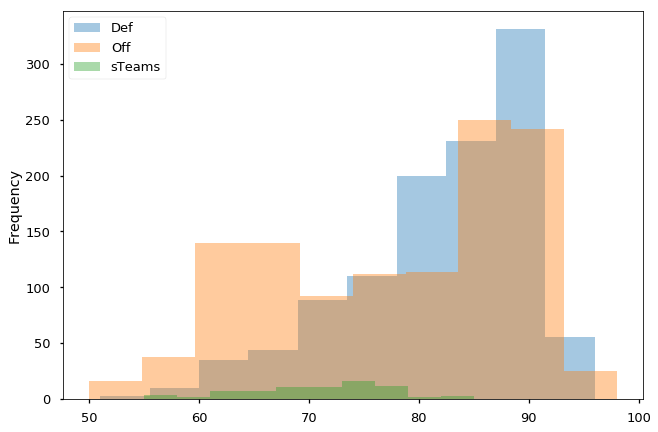

In [21]:
plt.style.use('seaborn-talk')
df.groupby('pos_class')['Speed'].plot(kind = 'hist', alpha = .4, legend = True)

pos_class
Def       AxesSubplot(0.125,0.125;0.775x0.755)
Off       AxesSubplot(0.125,0.125;0.775x0.755)
sTeams    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

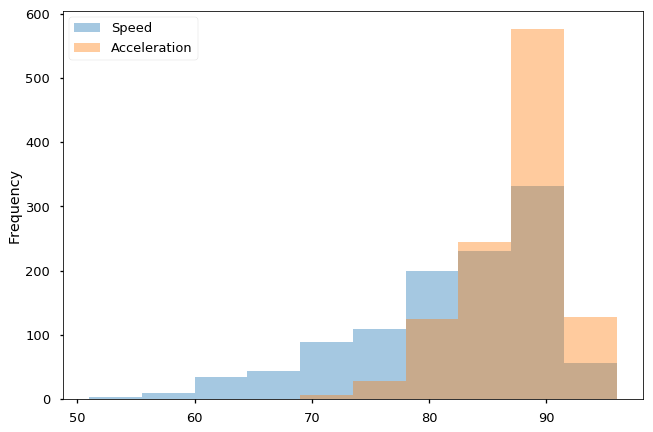

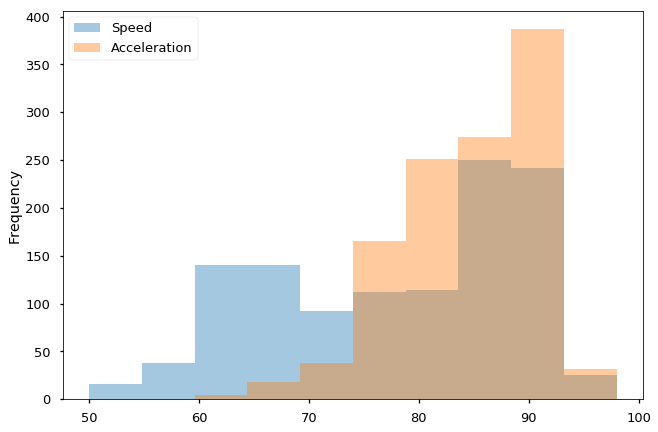

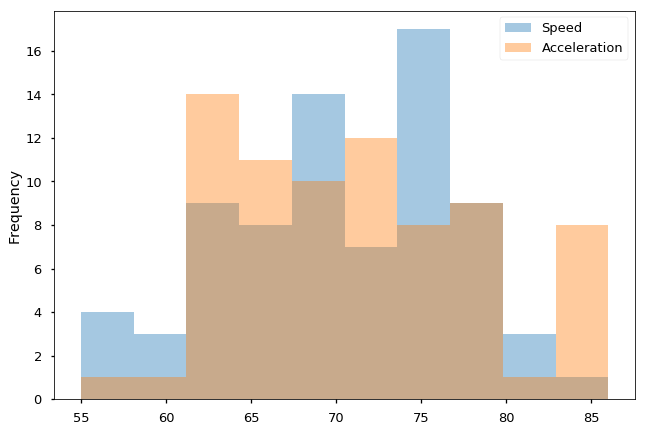

In [22]:
df.groupby('pos_class')['Speed',"Acceleration"].plot(kind = 'hist', alpha = .4, legend = True)

pos_class
Def       [[AxesSubplot(0.125,0.125;0.215278x0.755), Axe...
Off       [[AxesSubplot(0.125,0.125;0.215278x0.755), Axe...
sTeams    [[AxesSubplot(0.125,0.125;0.215278x0.755), Axe...
dtype: object

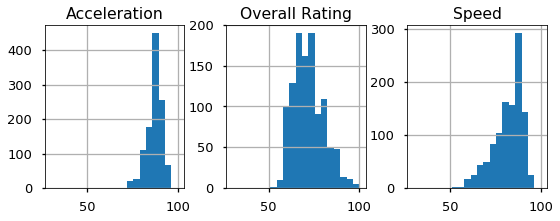

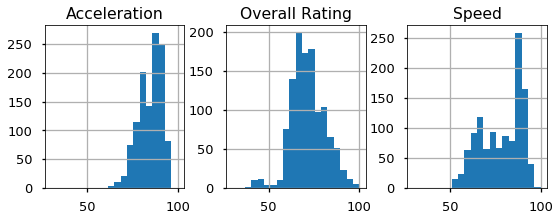

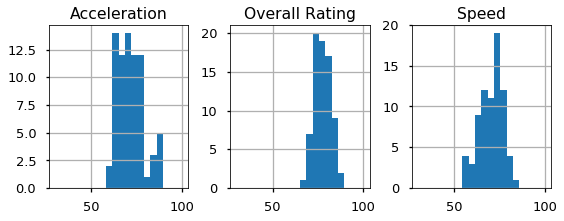

In [23]:
df[['Overall Rating', 'Speed', 'Acceleration','pos_class']].groupby('pos_class').hist(
    figsize=(9,3),
    layout =(1,3),
    bins = 20,
    range=[30,100]
)
#probably could get away with a ton of variables at a time in need be

In [24]:
df.columns

Index(['Dev Trait', 'Overall Rating', 'Speed', 'Acceleration', 'Strength',
       'Agility', 'Awareness', 'Catching', 'Carrying', 'Throw Power',
       'Throw Accuracy', 'Kick Power', 'Kick Accuracy', 'Run Block',
       'Pass Block', 'Tackle', 'Jumping', 'Kick Return', 'Injury', 'Stamina',
       'Toughness', 'Trucking', 'Elusiveness', 'Ball Carrier Vision',
       'Stiff Arm', 'Spin Move', 'Juke Move', 'Impact Blocking',
       'Run Block Strength', 'Run Block Footwork', 'Pass Block Strength',
       'Pass Block Footwork', 'Power Moves', 'Finesse Moves', 'Block Shedding',
       'Pursuit', 'Play Recognition', 'Man Coverage', 'Zone Coverage',
       'Spectacular Catch', 'Catch In Traffic', 'Route Running', 'Hit Power',
       'Press', 'Release', 'Throw Accuracy Short', 'Throw Accuracy Mid',
       'Throw Accuracy Deep', 'Play Action', 'Throw on the Run', 'Height',
       'Weight', 'Age', 'Total Salary', 'Signing Bonus', 'Handedness',
       'pos_class'],
      dtype='object')

In [25]:
#list of stats I want to explore

speed_stats = ['Speed', 'Acceleration','Agility','Elusiveness','pos_class']
throw_stats = ['Throw Power','Throw Accuracy', 'Throw Accuracy Short', 'Throw Accuracy Mid',
               'Throw Accuracy Deep', 'Play Action', 'Throw on the Run','pos_class']
special_stats = ['Kick Power', 'Kick Accuracy','pos_class']
physical_stats = ['Strength','Injury', 'Stamina','Toughness','Height','Weight', 'Age','pos_class']
run_stats = ['Trucking',  'Ball Carrier Vision','Stiff Arm', 'Spin Move', 'Juke Move','pos_class']
block_stats = ['Run Block','Pass Block','Impact Blocking','Run Block Strength', 
               'Run Block Footwork', 'Pass Block Strength','Pass Block Footwork','pos_class']
tackle_stats = ['Tackle','Power Moves', 'Finesse Moves', 'Block Shedding','Hit Power','pos_class']
wr_stats = ['Spectacular Catch', 'Catch In Traffic', 'Route Running','pos_class']
db_stats = ['Play Recognition', 'Man Coverage', 'Zone Coverage','Spectacular Catch','Press', 'Release','pos_class']

pos_class
Def       [[AxesSubplot(0.125,0.125;0.158163x0.755), Axe...
Off       [[AxesSubplot(0.125,0.125;0.158163x0.755), Axe...
sTeams    [[AxesSubplot(0.125,0.125;0.158163x0.755), Axe...
dtype: object

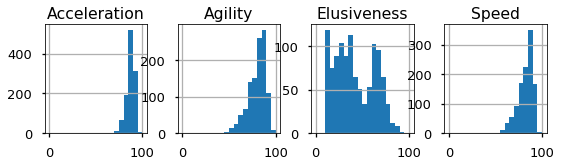

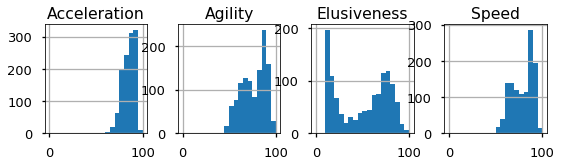

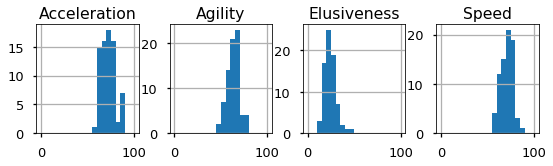

In [26]:
df[speed_stats].groupby('pos_class').hist(
    figsize=(9,2),
    layout= (1,4),
    bins =20, 
    range=[0, 100]
)

pos_class
Def       [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
Off       [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
sTeams    [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
dtype: object

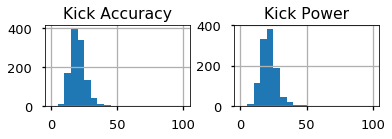

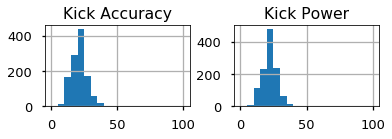

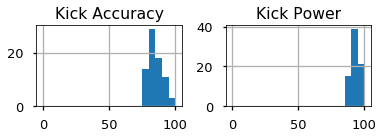

In [27]:
df[special_stats].groupby('pos_class').hist(
    figsize=(6,1.5),
    layout= (1,2),
    bins =20, 
    range=[0, 100]
)

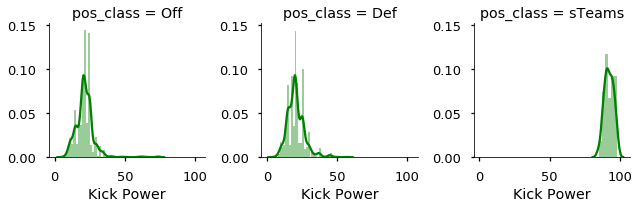

In [28]:
g = sns.FacetGrid(df[special_stats], col = "pos_class")
g.map(sns.distplot, 'Kick Power', kde = True, color = 'g')

''

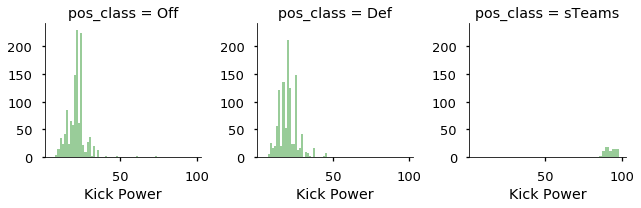

In [29]:
#fig, axarr = plt.subplots(2, 1, figsize=(12, 8))
#both "fig" and "ax" are completely arbitrary.  Don't need either of them.  

g = sns.FacetGrid(df[special_stats], col = "pos_class", hue = "pos_class")
g.map(sns.distplot, 'Kick Power', kde = False, color = 'g')
#g.map(sns.distplot, 'Kick Accuracy', kde = False, color = 'g')

""#subplots(rows, colums)

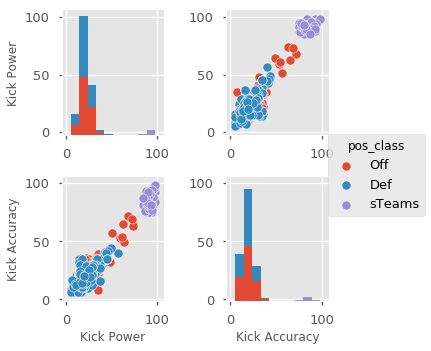

In [31]:
"""
'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 
 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 
 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 
 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', '_classic_test']
"""
plt.style.use('ggplot')

sns.pairplot(df[special_stats], hue = "pos_class")

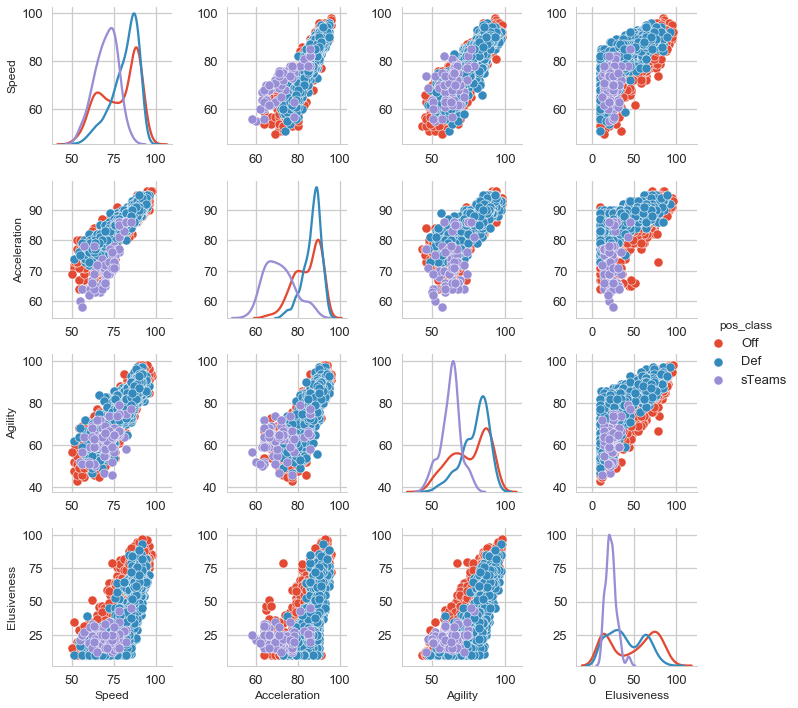

In [35]:
plt.style.use('seaborn-whitegrid')
sns.pairplot(df[speed_stats], hue = "pos_class", diag_kind = "kde")

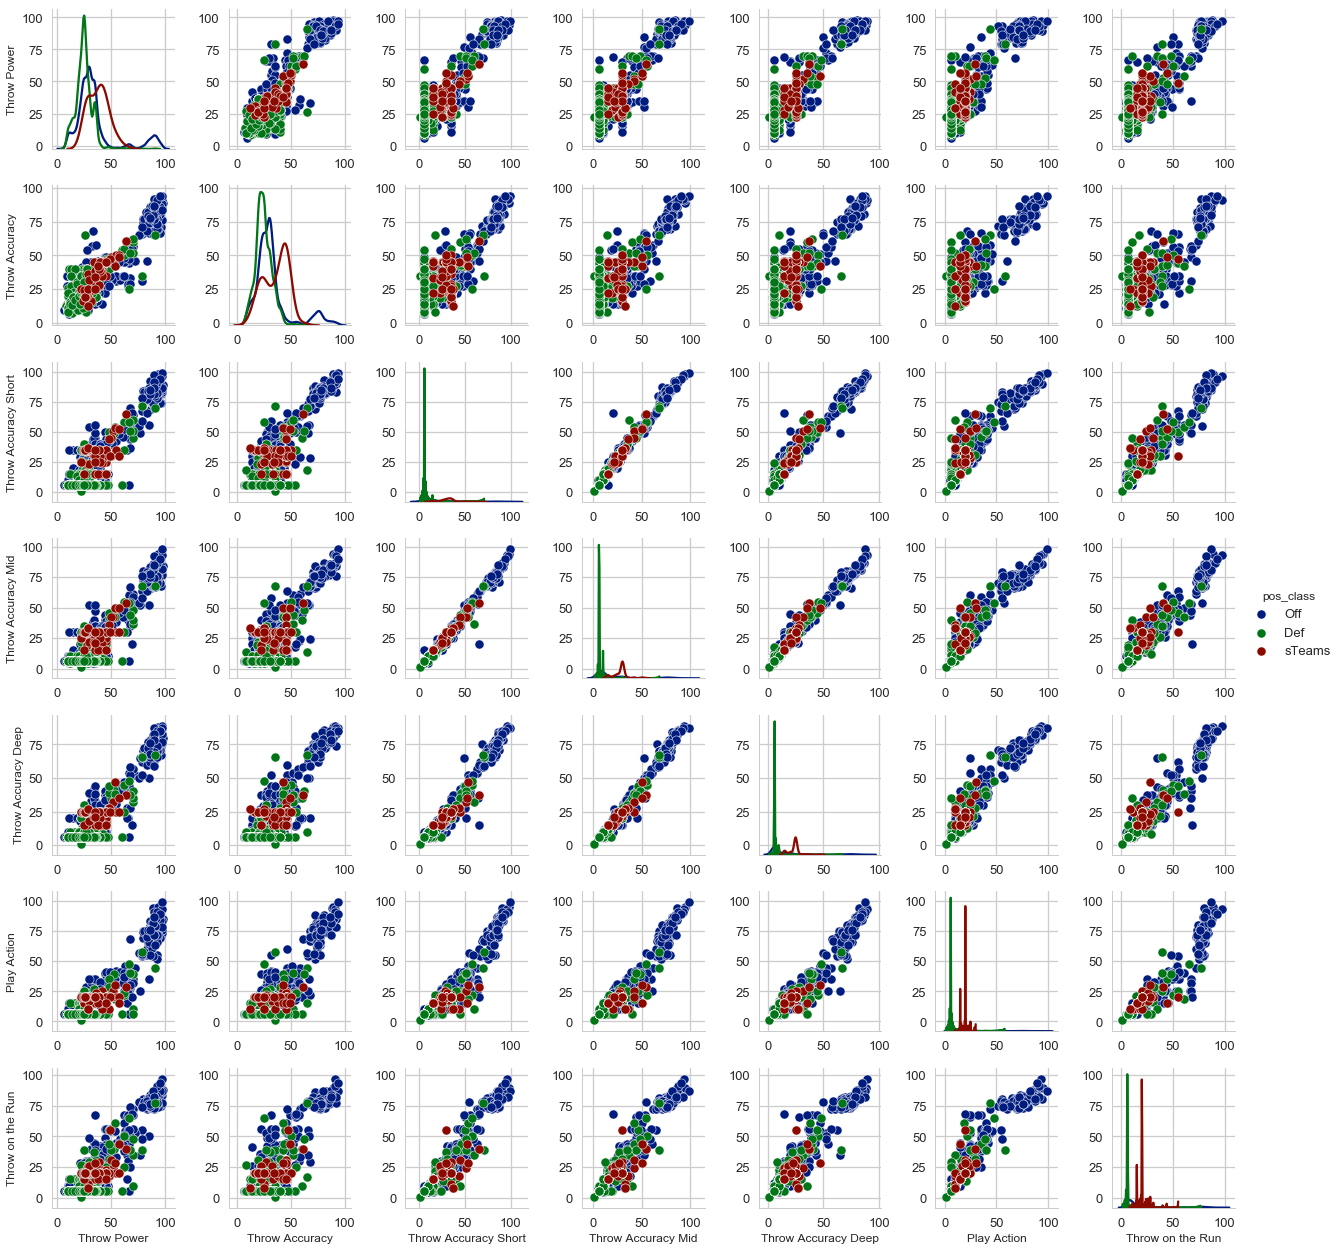

In [36]:
plt.style.use('seaborn-dark-palette')
sns.pairplot(df[throw_stats], hue = "pos_class", diag_kind = "kde")

pos_class
Def       AxesSubplot(0.125,0.125;0.775x0.755)
Off       AxesSubplot(0.125,0.125;0.775x0.755)
sTeams    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Throw Accuracy Short, dtype: object

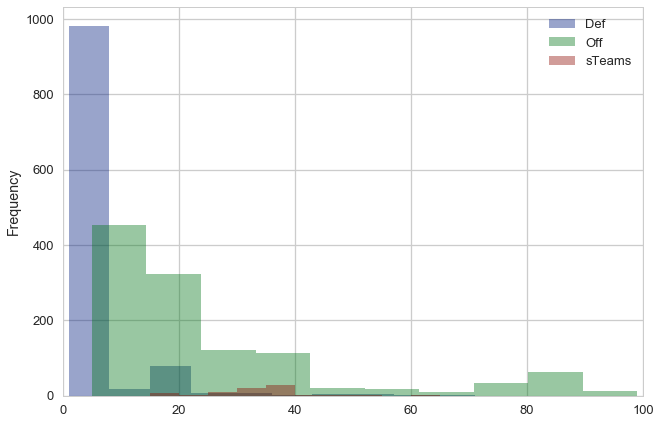

In [46]:
plt.style.use('seaborn-talk')
df.groupby('pos_class')['Throw Accuracy Short'].plot(kind = 'hist', alpha = .4, legend = True, xlim = (0,100))

In [42]:
df[throw_stats].describe()

,Throw Power,Throw Accuracy,Throw Accuracy Short,Throw Accuracy Mid,Throw Accuracy Deep,Play Action,Throw on the Run
count,2353.000000,2353.000000,2353.000000,2353.000000,2353.000000,2353.000000,2353.000000
mean,30.610285,28.618360,16.130047,14.319167,12.640884,12.137272,13.799830
std,16.261699,13.840492,18.619674,17.032124,15.824741,15.539623,17.264582
min,6.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,22.000000,21.000000,6.000000,6.000000,6.000000,6.000000,6.000000
50%,27.000000,25.000000,6.000000,6.000000,6.000000,6.000000,6.000000
75%,35.000000,32.000000,15.000000,10.000000,10.000000,10.000000,10.000000
max,98.000000,94.000000,99.000000,98.000000,89.000000,99.000000,97.000000


Above suggests that all you need to do to id special teams is either kick accuracy or kick power.  Based on what I understand I think I only need to look at one moving forward.  So for my model, I'm going to include one or the other and then see how I in terms of accuarcy. 

So moving foward, going to drop all the instances of speacial teams and see if I can identify any instances where they are super differnet

In [43]:
dfOffnDef = df[df['pos_class'] != 'sTeams']

pos_class
Def    [[Axes(0.125,0.125;0.0880682x0.775), Axes(0.23...
Off    [[Axes(0.125,0.125;0.0880682x0.775), Axes(0.23...
dtype: object

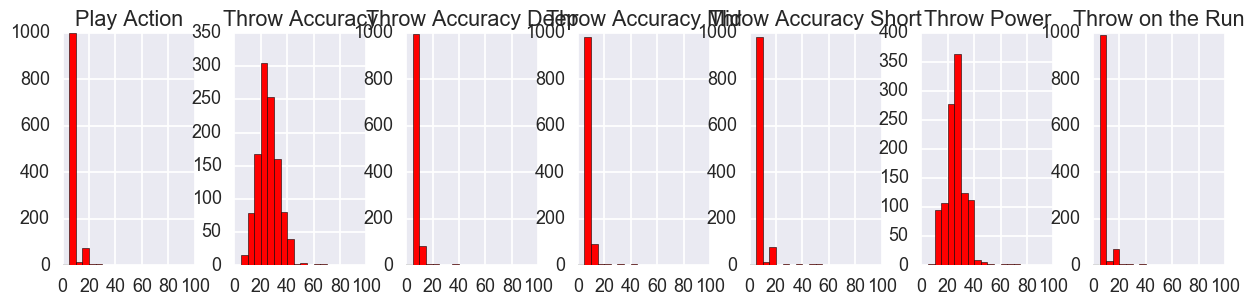

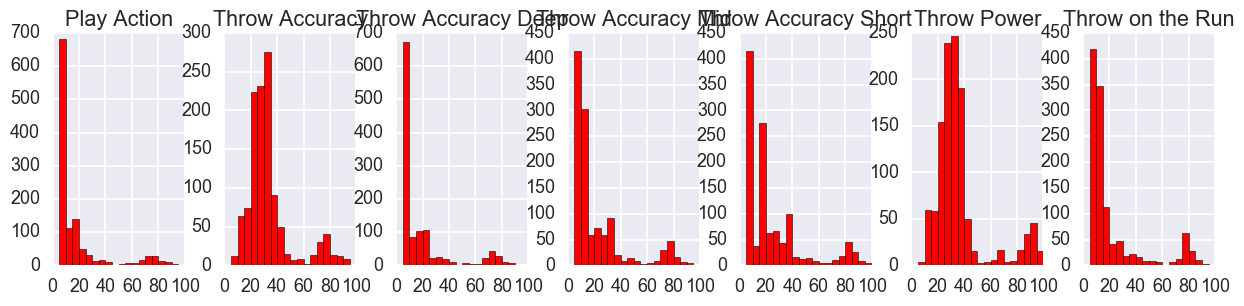

In [44]:
dfOffnDef[throw_stats].groupby('pos_class').hist(
    figsize=(15,3),
    layout = (1,7),
    bins =20, 
    range=[0, 100],
    color = 'red') #can I change this so the colors are different between offense and defense?  Maybe something 
#seaborn can do?

In [ ]:
#based on above, as expected, see a pretty uniform distribution for defense, where players aren't good at throwing
#for offense, see the expected bimodal distribution.  Most people can't throw, but the quarterbacks (and maybe some rb and wr)
#can as well

#let's select two options for it

#throw accuracy
#throw on the run


In [ ]:
#Need to look at Seaborn Facegrid.  Might help a lot for what I'm trying to do

pos_class
Def       AxesSubplot(0.125,0.125;0.775x0.755)
Off       AxesSubplot(0.125,0.125;0.775x0.755)
sTeams    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Acceleration, dtype: object

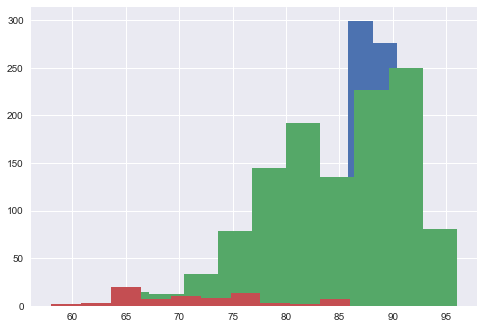

In [76]:
df.groupby('pos_class').Acceleration.hist()

In [69]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', '_classic_test']


In [28]:
#https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6


#defines pos_class as the target variable (what we are trying to predict)
y = df.pos_class


#important to understand that in the below code, I am using all variables as training data.  But I need to do some EDA to
#determine which variables have differences between the two groups




#create training and testing variables
X_train, X_test, y_train, y_test = train_test_split(df,y,test_size = 0.2)


In [31]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(1882, 57) (1882,)
(471, 57) (471,)


In [32]:
#
X_train.head()

,Dev Trait,Overall Rating,Speed,Acceleration,Strength,Agility,Awareness,Catching,Carrying,Throw Power,...,Throw Accuracy Deep,Play Action,Throw on the Run,Height,Weight,Age,Total Salary,Signing Bonus,Handedness,pos_class
1167,-,61,92,90,68,86,49,54,57,27,...,6,6,6,72,186,24,1020000,0,Right,Def
1384,-,64,90,92,68,87,54,77,69,62,...,47,40,61,69,189,24,1020000,0,Right,Off
219,-,59,77,81,79,73,41,34,40,24,...,6,6,6,78,276,23,1020000,0,Right,Def
1252,-,79,90,90,52,92,77,69,62,54,...,38,19,61,71,192,27,2500000,2000000,Right,Def
1972,-,62,81,83,55,72,54,28,57,89,...,69,72,75,74,220,26,1170000,0,Right,Off
